### Training and Evaluating the of the Regression Model

In this notebook, the regression model is trained using the preprocessed training data and an initial configuration. The model is then evaluated based on the test data and continuously optimized by adjusting the hyperparameters. The goal is to find the best hyperparameters for the model to achieve the best possible performance. 

In [1]:
import os
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras import layers, models, utils
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Set all random seeds to a fixed value to make the results reproducible
seed_value = 42
tf.random.set_seed(seed_value)
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)

In [3]:
# Load the dataset
data = pd.read_csv('../data/processed/preprocessed_data.csv')

features = data.drop('Anzahl_der_Fahrzeuge', axis=1)
target = data['Anzahl_der_Fahrzeuge']

# Split the data into training and test sets
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, random_state=seed_value)

In [4]:
def build_sequential_model(num_layers, neurons_per_layer, activation_function, input_shape, optimizer, loss_function, metrics):
    model = models.Sequential()

    model.shape = (input_shape, )

    for i in range(num_layers):
        model.add(layers.Dense(neurons_per_layer, activation=activation_function, name=f'hidden_layer_{i+1}'))

    model.add(layers.Dense(1, activation='relu', name='output'))

    model.compile(optimizer=optimizer, loss=loss_function, metrics=metrics)

    return model

In [5]:
def show_model_structure(input_model, input_shape):
    # Building the model in order to visualize the structure
    input_model.build(input_shape=(None, input_shape))

    # Printing a summary of the model
    input_model.summary()
    
def plot_model(input_model):
    return utils.plot_model(input_model, show_shapes=True, show_layer_names=True, show_trainable=True, show_layer_activations=True, expand_nested=True, dpi=96)

In [6]:
def plot_history(model_history):
    training_loss = model_history.history['loss']
    validation_loss = model_history.history['val_loss']
    epochs = range(1, len(training_loss) + 1)
    
    # Plot the training and validation loss
    plt.plot(epochs, training_loss, 'r--', label='Training loss')
    plt.plot(epochs, validation_loss, 'b-', label='Validation loss')
    plt.title('Training & validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    
def show_examplary_predictions(model, features_test, target_test):
    predictions = model.predict(features_test)
    predictions = predictions.flatten()
    predictions = np.round(predictions)
    
    results = pd.DataFrame({'Predicted': predictions, 'Actual': target_test, 'Difference (%)': ((target_test - predictions) / target_test) * 100})

    results = results.astype({'Actual': 'int32', 'Predicted': 'int32'})
    
    results['Difference (%)'] = results['Difference (%)'].round(0).astype('int32')
    
    return results

In [7]:
model = build_sequential_model(
    num_layers=2,
    neurons_per_layer=64,
    activation_function='relu',
    input_shape=(features_train.shape[1],),
    optimizer='adam',
    loss_function='mean_squared_error',
    metrics=['mse']
)

show_model_structure(model, features_train.shape[1])
# plot_model(model)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 64)             │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,737 (18.50 KB)

 Trainable params: 4,737 (18.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 47575.2930 - mse: 47577.0625 - val_loss: 45558.9336 - val_mse: 46493.9492
Epoch 2/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - loss: 41492.2734 - mse: 41494.7344 - val_loss: 26849.1816 - val_mse: 27489.2852
Epoch 3/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 848us/step - loss: 20413.6504 - mse: 20414.8398 - val_loss: 11860.4814 - val_mse: 12208.4688
Epoch 4/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 873us/step - loss: 11211.6621 - mse: 11212.2227 - val_loss: 11370.1621 - val_mse: 11701.8857
Epoch 5/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - loss: 10947.9824 - mse: 10948.5137 - val_loss: 11178.9688 - val_mse: 11509.3682
Epoch 6/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 833us/step - loss: 10774.6787 - mse: 10775.1885 - val_loss: 11033.9238 - val_mse: 11363.8711
Epoch 7/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 850us/step - loss: 10637.1123 - mse: 10637.6035 - val_loss: 10912.6201 - val_mse: 11242.3594
Epoch 8/10
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 844us/step - loss: 1052

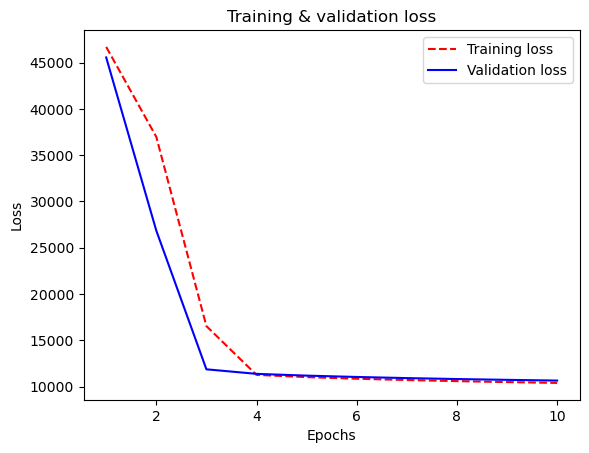

In [8]:
history = model.fit(features_train, target_train, epochs=10, batch_size=32, validation_data=(features_test, target_test))
plot_history(history)

In [9]:
example_predictions = show_examplary_predictions(model, features_test, target_test)
example_predictions.head(10)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


,Predicted,Actual,Difference (%)
867,224,130,-72
1221,251,564,55
874,232,77,-201
354,101,214,53
599,186,175,-6
2559,145,282,49
309,158,103,-53
2155,263,309,15
2337,318,463,31
479,106,83,-28


In [10]:
# Calculate the average difference between the actual and predicted values but use the absolute values
average_difference = example_predictions['Difference (%)'].abs().mean()
print(f'The average difference between the actual and predicted values is {average_difference:.2f}%')

The average difference between the actual and predicted values is 71.63%


#### First Optimization

In the first optimization step, the number of layers and epochs are doubled.

Epoch 1/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 44868.9180 - mse: 44871.8555 - val_loss: 14730.5859 - val_mse: 14967.4619
Epoch 2/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 991us/step - loss: 11951.3584 - mse: 11951.8838 - val_loss: 10849.0098 - val_mse: 11162.2861
Epoch 3/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step - loss: 10369.1748 - mse: 10369.5342 - val_loss: 10389.7354 - val_mse: 10690.6963
Epoch 4/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 958us/step - loss: 9970.7754 - mse: 9971.0234 - val_loss: 10064.1758 - val_mse: 10343.6309
Epoch 5/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 946us/step - loss: 9693.0195 - mse: 9693.1719 - val_loss: 9804.1914 - val_mse: 10058.3154
Epoch 6/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step - loss: 9474.2793 - mse: 9474.3389 - val_loss: 9549.9785 - val_mse: 9774.0205
Epoch 7/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step - loss: 9278.9062 - mse: 9278.8945 - val_loss: 9322.3672 - val_mse: 9522.6709
Epoch 8/20
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 950us/step - loss: 9122.4365 - mse: 

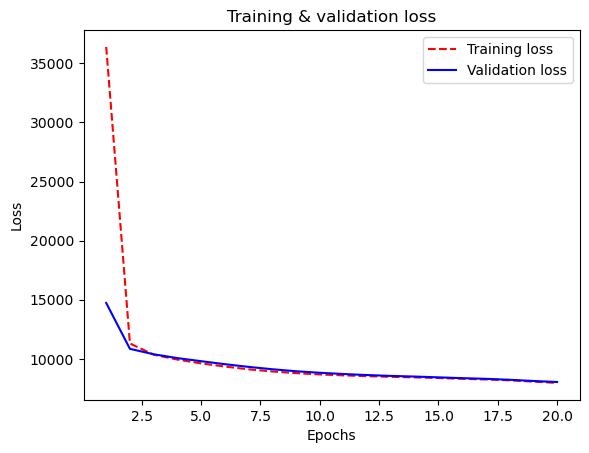

In [11]:
model = build_sequential_model(
    num_layers=4,
    neurons_per_layer=64,
    activation_function='relu',
    input_shape=(features_train.shape[1],),
    optimizer='adam',
    loss_function='mean_squared_error',
    metrics=['mse']
)

history = model.fit(features_train, target_train, epochs=20, batch_size=32, validation_data=(features_test, target_test))
plot_history(history)

In [12]:
example_predictions = show_examplary_predictions(model, features_test, target_test)
average_difference = example_predictions['Difference (%)'].mean()
print(f'The average difference between the actual and predicted values is {average_difference:.2f}%')

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
The average difference between the actual and predicted values is -31.99%
